In [ ]:
####코랩에서 실습하기 

# sqlite3

In [ ]:
import sqlite3

dbname = "multicampus.db"
conn = sqlite3.connect(dbname)

curs = conn.cursor()
curs.execute("create table if not exists student (name, age) ")
curs.execute("insert into student values('다은', 20)")
values = [('김길동',20),('박길동',30),('정길동',40)]
curs.executemany("insert into student values(?, ?)", values)
conn.commit()
conn.close()

In [ ]:
conn = sqlite3.connect(dbname)
curs = conn.cursor()
curs.execute("select * from student")
for row in curs:
  print(row)
conn.close()

('다은', 20)
('김길동', 20)
('박길동', 30)
('정길동', 40)


In [ ]:
conn = sqlite3.connect(dbname)
curs = conn.cursor()
curs.execute("select * from student")
table = curs.fetchall()
for row in table:
  print(row)
conn.close()

('다은', 20)
('김길동', 20)
('박길동', 30)
('정길동', 40)


In [ ]:
import pandas as pd

pd.DataFrame(table, columns=["이름", "나이"])

,이름,나이
0,다은,20
1,김길동,20
2,박길동,30
3,정길동,40


# MySQL

In [ ]:
import pymysql
import pandas as pd

conn = pymysql.connect(host="localhost" ,
  user="root", password="12345", db="test" , charset="utf8")

curs = conn.cursor()
sql = "select * from departments"
curs.execute(sql)
rows = curs.fetchall()
conn.close()
pd.DataFrame(rows)

# ORACLE

In [ ]:

!pip install xc_Oracle

In [ ]:
import datetime
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor = conn.cursor()
sql='''select * from employees  
     where employee_id >= :aa  
     and hire_date >= :bb      
     and first_name like :cc   
     order by employee_id'''
cursor.execute(sql, {"aa":100, 
                      "bb":datetime.date(2000,1,1),
                     "cc":'S%'
                    })
alist = cursor.fetchall()
pd.DataFrame(alist)

In [ ]:
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor = conn.cursor()
sql = '''
  insert into customer values (:1, :2, :3)   
'''
sql2 = '''
   create table customer(name varchar2(20),
       category number(1), region varchar2(10))
'''  
alist = [('AA', 1, '서울'),('BB', 2, '대전'), ('CC', 3, '부산')]
cursor.execute("drop table customer")
cursor.execute(sql2)
cursor.executemany(sql, alist )
conn.commit()
conn.close()

In [ ]:
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor = conn.cursor()
sql = '''
  select * from customer
'''
cursor.execute(sql) 
table = cursor.fetchall()
conn.close()
df = pd.DataFrame(table, columns=["고객이름","category","location"])

df

In [ ]:
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
sql = "select * from customer"
df = pd.read_sql(sql, conn)
df

# 웹크롤링

In [ ]:
url = "https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105"
#get방식 요청 : ?mode=LSD&mid=shm&sid1=105


import requests
url = "http://www.daum.net"

response = requests.get(url)

#<Response [200]> : 요청에 대한 응답이 정상이다. 
#404 : 페이지주소 없다. 
response.text
response.headers

#response.headers['User-Agent']

for key in response.headers:
  print(key, response.headers[key], sep="-->")

Date-->Tue, 19 Jan 2021 08:30:58 GMT
X-Frame-Options-->SAMEORIGIN
X-UA-Compatible-->IE=10
Expires-->Sat, 01, Jan 1970 22:00:00 GMT
Pragma-->no-cache
Cache-Control-->no-cache, no-store, must-revalidate
P3P-->CP="ALL DSP COR MON LAW IVDi HIS IVAi DELi SAMi OUR LEG PHY UNI ONL DEM STA INT NAV PUR FIN OTC GOV"
Content-Type-->text/html;charset=UTF-8
Content-Language-->en-US
Vary-->Accept-Encoding
Content-Encoding-->gzip
X-UA-Device-Type-->pc
Content-Length-->48574
Connection-->close


In [ ]:
url = "https://news.naver.com/main/main.nhn"
req_header = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36",
    "Referer":"https://news.naver.com/"
}
param1 = {"mode":"LSD", "mid":"shm", "sid1":105}
param2 = [("mode","LSD"), ("mid","shm"), ("sid1",105)]
response = requests.get(url, headers=req_header, params=param2)
response.text[1500:]

'ry">\r\n<meta name="twitter:title"\t\tcontent="IT/과학 : 네이버 뉴스">\r\n<meta name="twitter:site"       content="네이버 뉴스">\r\n<meta name="twitter:creator"    content="네이버 뉴스">\r\n<meta name="twitter:image"\t\tcontent="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png">\r\n<meta name="twitter:description" content="모바일, 인터넷, SNS, 통신 등 IT/과학 분야 뉴스 제공">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<title>IT/과학 홈 : 네이버 뉴스\t</title>\r\n<link rel="shortcut icon" type="image/x-icon" href="https://ssl.pstatic.net/static.news/image/news/2014/favicon/favicon.ico" />\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\n\t\n\t\n\t\t<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.news/pnews/resources/20210112_131823/css/common.css"/>\n\t\t<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.news/pnews/resources/20210112_131823/css/news.css"/>\n\t\t\n\t\t\n\t\n\t\n\n\r\n\r\n\r\n\r\n\r\n<script type="text/javascript" src="https://ssl.pstatic.net/stat

In [ ]:
s = response.text

#정규표현식(Regular Expression)
import re
reg_exp = re.compile("\d{8}.png")
reg_exp = re.compile("\d{3}-\d{4}-\d{4}")
reg_exp = re.compile("모바일")
reg_exp.findall(s)

['모바일', '모바일', '모바일', '모바일', '모바일', '모바일', '모바일']

In [ ]:
url = "https://imgnews.pstatic.net/image/417/2021/01/19/0000646285_001_20210119110113846.jpg?type=w647"

response = requests.get(url)
with open("aa.jpg", "wb") as file:
  print(f"파일저장.......{len(response.content)}")
  file.write( response.content)



파일저장.......139477


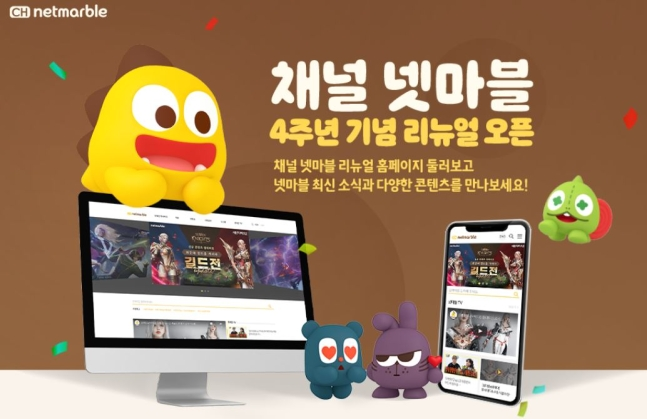

In [ ]:
from IPython.display import Image
Image("aa.jpg", width=100, height=100)

In [ ]:
url = "https://api.bithumb.com/public/ticker/BTC"
response = requests.get(url)

#문자열로 받기-->객체로 변환 
response.text
import json
obj = json.loads(response.text)
obj['data']['closing_price']

'39888000'

In [ ]:
#JSON를 Object로 받기
response.json()['data']['closing_price']

'39888000'

In [ ]:
url = "https://api.bithumb.com/public/ticker/All"
response = requests.get(url)

#모든종목의 종가를 출력한다. 
bithumb = response.json()
for key,val  in bithumb["data"].items():
  if "closing_price" not in val:continue
  print(f"종목이름은 {key} 종가는 {val['closing_price']}이다.")

In [ ]:
#dir(BeautifulSoup)

In [ ]:
from bs4 import BeautifulSoup  

url = "https://www.daum.net/"
response = requests.get(url)
html = response.text

#문자열을 객체로 변경한다. 
soup = BeautifulSoup(html, "html.parser")
####   seletor : # ->ID  .-->class  > -->자식 
#wrapSearch > div.slide_favorsch > ul:nth-child(1) > li:nth-child(1) > a
#wrapSearch > div.slide_favorsch > ul:nth-child(1) > li:nth-child(2) > a
#공백주의 
search = "#wrapSearch > div.slide_favorsch > ul > li > a"
mlist = soup.select(search)

mydict = {}

for aa in mlist:
  mydict[aa.text] = aa["href"]
  #print(aa.text, aa["href"], sep="-->")

In [ ]:
mydict

{'6평농막가격': 'https://search.daum.net/search?w=tot&q=6%ED%8F%89%EB%86%8D%EB%A7%89%EA%B0%80%EA%B2%A9&DA=NPT',
 'opp봉투': 'https://search.daum.net/search?w=tot&q=opp%EB%B4%89%ED%88%AC&DA=NPT',
 '고민시 화보': 'https://search.daum.net/search?w=tot&q=%EA%B3%A0%EB%AF%BC%EC%8B%9C+%ED%99%94%EB%B3%B4&DA=NPI&rtmaxcoll=NNS',
 '구혜선 최종회': 'https://search.daum.net/search?w=tot&q=%ED%8E%98%EC%9D%B4%EC%8A%A4%EC%95%84%EC%9D%B4%EB%94%94&DA=NPI',
 '박은석 사칭계정': 'https://search.daum.net/search?w=tot&q=%EB%B0%95%EC%9D%80%EC%84%9D+%EC%82%AC%EC%B9%AD%EA%B3%84%EC%A0%95&DA=NPI&rtmaxcoll=NNS',
 '사회적 거리두기': 'https://search.daum.net/search?w=tot&q=%EC%82%AC%ED%9A%8C%EC%A0%81+%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0&DA=NPI',
 '연말파티음식': 'https://search.daum.net/search?w=tot&q=%EC%97%B0%EB%A7%90%ED%8C%8C%ED%8B%B0%EC%9D%8C%EC%8B%9D&DA=NPT',
 '오리털이불': 'https://search.daum.net/search?w=tot&q=%EC%98%A4%EB%A6%AC%ED%84%B8%EC%9D%B4%EB%B6%88&DA=NPT',
 '윤여정 13관왕': 'https://search.daum.net/search?w=tot&q=%EC%9C%A4%EC%97%AC%EC%A0%95+13%EA%

In [ ]:
from bs4 import BeautifulSoup  

url = "https://www.daum.net/"
response = requests.get(url)
html = response.text

#문자열을 객체로 변경한다. 
soup = BeautifulSoup(html, "html.parser")

mlist = soup.find("div", {"class", "slide_favorsch"})
alist = mlist.find_all("a")
mydict = {}

for aa in alist:
  mydict[aa.text] = aa["href"]
  #print(aa.text, aa["href"], sep="-->")

In [ ]:
mydict

{'고민시 화보': 'https://search.daum.net/search?w=tot&q=%EA%B3%A0%EB%AF%BC%EC%8B%9C+%ED%99%94%EB%B3%B4&DA=NPI&rtmaxcoll=NNS',
 '구리스파는곳': 'https://search.daum.net/search?w=tot&q=%EA%B5%AC%EB%A6%AC%EC%8A%A4&DA=NPT',
 '구혜선 최종회': 'https://search.daum.net/search?w=tot&q=%ED%8E%98%EC%9D%B4%EC%8A%A4%EC%95%84%EC%9D%B4%EB%94%94&DA=NPI',
 '금값시세': 'https://search.daum.net/search?w=tot&q=%EA%B8%88%EA%B0%92%EC%8B%9C%EC%84%B8&DA=NPT',
 '등기구파는곳': 'https://search.daum.net/search?w=tot&q=%EB%93%B1%EA%B8%B0%EA%B5%AC&DA=NPT',
 '박은석 사칭계정': 'https://search.daum.net/search?w=tot&q=%EB%B0%95%EC%9D%80%EC%84%9D+%EC%82%AC%EC%B9%AD%EA%B3%84%EC%A0%95&DA=NPI&rtmaxcoll=NNS',
 '사회적 거리두기': 'https://search.daum.net/search?w=tot&q=%EC%82%AC%ED%9A%8C%EC%A0%81+%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0&DA=NPI',
 '윤여정 13관왕': 'https://search.daum.net/search?w=tot&q=%EC%9C%A4%EC%97%AC%EC%A0%95+13%EA%B4%80%EC%99%95&DA=NPI&rtmaxcoll=NNS',
 '이용우 전속계약': 'https://search.daum.net/search?w=tot&q=%EC%9D%B4%EC%9A%A9%EC%9A%B0+%EC%A0%84%EC%86%8D

In [ ]:
import urllib.parse 

s = 'https://search.daum.net/search?w=tot&q=%EA%B3%A0%EB%AF%BC%EC%8B%9C+%ED%99%94%EB%B3%B4&DA=NPI&rtmaxcoll=NNS'

urllib.parse.unquote_plus(s)


for aa in alist:
  mydict[aa.text] = urllib.parse.unquote_plus(aa["href"])


In [ ]:
mydict

{'고민시 화보': 'https://search.daum.net/search?w=tot&q=고민시 화보&DA=NPI&rtmaxcoll=NNS',
 '구리스파는곳': 'https://search.daum.net/search?w=tot&q=구리스&DA=NPT',
 '구혜선 최종회': 'https://search.daum.net/search?w=tot&q=페이스아이디&DA=NPI',
 '금값시세': 'https://search.daum.net/search?w=tot&q=금값시세&DA=NPT',
 '등기구파는곳': 'https://search.daum.net/search?w=tot&q=등기구&DA=NPT',
 '박은석 사칭계정': 'https://search.daum.net/search?w=tot&q=박은석 사칭계정&DA=NPI&rtmaxcoll=NNS',
 '사회적 거리두기': 'https://search.daum.net/search?w=tot&q=사회적 거리두기&DA=NPI',
 '윤여정 13관왕': 'https://search.daum.net/search?w=tot&q=윤여정 13관왕&DA=NPI&rtmaxcoll=NNS',
 '이용우 전속계약': 'https://search.daum.net/search?w=tot&q=이용우 전속계약&DA=NPI&rtmaxcoll=NNS',
 '이정수 사과': 'https://search.daum.net/search?w=tot&q=이정수 사과&DA=NPI&rtmaxcoll=NNS',
 '주니어의류쇼핑몰': 'https://search.daum.net/search?w=tot&q=주니어의류쇼핑몰&DA=NPT',
 '청소용품': 'https://search.daum.net/search?w=tot&q=청소용품&DA=NPT',
 '코로나19 발생현황': 'https://search.daum.net/search?w=tot&q=코로나19 발생현황&DA=NPI',
 '톡터뷰이 변요한': 'https://search.daum.net/search

In [ ]:
url ="https://comic.naver.com/webtoon/list.nhn?titleId=748105"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
#공백은 자손 , >는 자식 
alist = soup.select("#content tr > td > a > img")
alist
##content > table > tbody > tr:nth-child(2) > td.title > a
##content > table > tbody > tr:nth-child(3) > td.title > a
###content > table > tbody > tr:nth-child(4) > td.title > a

# for aa in alist:
#   print(aa["alt"], aa["src"] , sep="-->")

#모든 이미지의 경로를 list만들어보자

image_src = [aa["src"] for aa in alist]
image_src

['https://shared-comic.pstatic.net/thumb/webtoon/748105/58/thumbnail_202x120_1b3e5768-b4e0-477b-88a8-e3f693b90351.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/57/thumbnail_202x120_67ac6a40-ffd9-4444-9a2d-00bdc64059f7.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/56/thumbnail_202x120_56a2d1de-2c79-4406-8053-97a173ddc898.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/55/thumbnail_202x120_c455efff-74b3-4539-a9dd-6d67635d89da.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/54/thumbnail_202x120_f9ddf394-f310-4df9-a933-4b2a5c971e3a.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/53/thumbnail_202x120_e779a574-5122-49d7-973b-518e158fdaa7.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/52/thumbnail_202x120_74f0d4fc-6389-4977-90fd-55fcd3e49ac6.jpg',
 'https://shared-comic.pstatic.net/thumb/webtoon/748105/51/thumbnail_202x120_edd17224-8948-41e2-a3a8-432bb356468e.jpg',
 'https://shared-comic.pstatic.net/thumb

In [ ]:
import os

ouputDir = os.getcwd() + "/images"
if not os.path.isdir(ouputDir):
  os.makedirs(ouputDir)

In [ ]:
s = "https://shared-comic.pstatic.net/thumb/webtoon/748105/49/thumbnail_202x120_25203e05-edbb-4e85-9bfb-11e892661189.jpg"

os.path.basename(s)

'thumbnail_202x120_25203e05-edbb-4e85-9bfb-11e892661189.jpg'

In [ ]:
for image in image_src:
   image_data = requests.get(image).content
   file_name = ouputDir + "/" + os.path.basename(image)
   with open(file_name, "wb") as ff:
     print(f"이미지저장중......사이즈는 {len(image_data)}")
     ff.write(image_data)

이미지저장중......사이즈는 23747
이미지저장중......사이즈는 17008
이미지저장중......사이즈는 26393
이미지저장중......사이즈는 12335
이미지저장중......사이즈는 16378
이미지저장중......사이즈는 19098
이미지저장중......사이즈는 23506
이미지저장중......사이즈는 17684
이미지저장중......사이즈는 16384
이미지저장중......사이즈는 14827


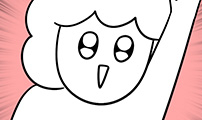

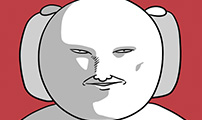

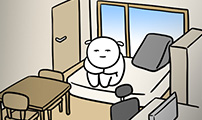

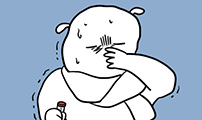

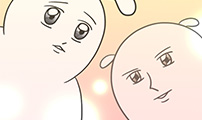

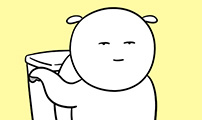

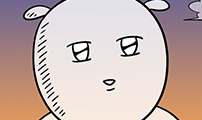

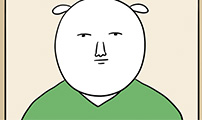

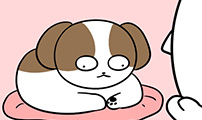

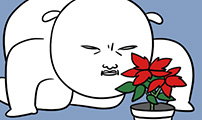

In [ ]:
import glob

jpglist = glob.glob(ouputDir + "/*.jpg" )
for img in jpglist:
  display(Image(img))

In [ ]:
#멜론사이트 
req_header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) \
                    Chrome/72.0.3626.81 Safari/537.36",
    "Referer": "https://www.naver.com/"
}
url = "https://www.melon.com/chart/index.htm"
html = requests.get(url, headers=req_header).text

soup = BeautifulSoup(html, "html.parser")
#soup.select()
#soup.find_all()
#nth-child(2n+1)  홀수번째 ....nth-of_type()
#<div id = "frm" class="ellipsis.rank01">
search = "#frm > div tr > td:nth-of-type(4) > div > div > div.ellipsis.rank01 > span > a"
soup.select(search)
##frm > div > table > tbody > tr:nth-child(1) > td:nth-child(4) > div > div > div.ellipsis.rank01 > span > a
##frm > div > table > tbody > tr:nth-child(2) > td:nth-child(4) > div > div > div.ellipsis.rank01 > span > a

[ (idx+1, aa["title"])  for idx, aa in enumerate(soup.select(search))]



[(1, 'VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 재생'),
 (2, '밤하늘의 별을(2020) 재생'),
 (3, 'Dynamite 재생'),
 (4, '잠이 오질 않네요 재생'),
 (5, 'Lovesick Girls 재생'),
 (6, '취기를 빌려 (취향저격 그녀 X 산들) 재생'),
 (7, '힘든 건 사랑이 아니다 재생'),
 (8, '내일이 오면 (Feat. 기리보이, BIG Naughty (서동현)) 재생'),
 (9, 'Rosario (Feat. CL, ZICO) 재생'),
 (10, '내 얘기 같아 (Feat. 헤이즈) 재생'),
 (11, 'Life Goes On 재생'),
 (12, '오래된 노래 재생'),
 (13, 'Savage Love (Laxed - Siren Beat) (BTS Remix) 재생'),
 (14, '내 마음이 움찔했던 순간 (취향저격 그녀 X 규현) 재생'),
 (15, '화(火花) 재생'),
 (16, '나랑 같이 걸을래 (바른연애 길잡이 X 적재) 재생'),
 (17, '에잇(Prod.&Feat. SUGA of BTS) 재생'),
 (18, 'CREDIT (Feat. 염따, 기리보이, Zion.T) 재생'),
 (19, '혼술하고 싶은 밤 재생'),
 (20, '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 재생'),
 (21, '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 재생'),
 (22, 'Blueming 재생'),
 (23, '늦은 밤 너의 집 앞 골목길에서 재생'),
 (24, 'When We Disco (Duet with 선미) 재생'),
 (25, '모든 날, 모든 순간 (Every day, Every Moment) 재생'),
 (26, '어떻게 지내 (Prod. By VAN.C) 재생'),
 (27, 'Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom) 재생'),
 (28, 'METEOR 재생'),
 (29, 'How You Like Tha

In [ ]:
!pip install selenium

     |████████████████████████████████| 911kB 7.9MB/s 


In [ ]:
!apt-get update # to update ubuntu to correctly run apt install

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [43.6 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.

In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 62 not upgraded.
Need to get 81.0 MB of archives.
After this operation, 273 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 87.0.4280.66-0ubuntu0.18.04.1 [1,122 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 87.0.4280.66-0ubuntu0.18.04.1 [71.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 87.0.428

In [ ]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get("http://python.org")
#print(wd)

alist = wd.find_elements_by_css_selector("#top > nav > ul > li")
#print(alist)
pp = None
for m in alist:
  print(m.text)
  if m.text == "PyPI":
    pp = m
    break

pp.click()

##top > nav > ul > li.psf-meta

import time
time.sleep(5)
wd.quit()


Python
PSF
Docs
PyPI


In [ ]:
url = "https://www.w3schools.com/colors/colors_rgb.asp"

driver = webdriver.Chrome('chromedriver',options=chrome_options)
driver.get(url )
time.sleep(2)

driver.find_element_by_css_selector("#r01").clear()
driver.find_element_by_css_selector("#r01").send_keys(0)
driver.find_element_by_css_selector("#g01").send_keys(255)
driver.find_element_by_css_selector("#b01").send_keys(255)

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
color = soup.find("div", {"id":"hex01"}).text
print(color)

time.sleep(3)
driver.quit() #browser가 닫힌다. 

#00ffff


# 윈도우에서 셀레니엄 사용하기
+ 크롬드라이버를 다운한다.
> + 현재 경로에서 driver/chromedriver.exe를 위치한다. 

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time 

url = "https://www.w3schools.com/colors/colors_rgb.asp"

driver = webdriver.Chrome('driver/chromedriver')
driver.get(url )
time.sleep(2)

driver.find_element_by_css_selector("#r01").clear()
driver.find_element_by_css_selector("#r01").send_keys(0)
driver.find_element_by_css_selector("#g01").send_keys(255)
driver.find_element_by_css_selector("#b01").send_keys(255)

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
color = soup.find("div", {"id":"hex01"}).text
print(color)

time.sleep(3)
driver.quit() #browser가 닫힌다. 
